# Example code for your final projects.

In this example, we will use a dataset named "breast cancer". The dataset is consist of rows of 569 and columns of 31. And the target variables consist of 0 and 1.

And with this dataset, we will practice how to build some classification models and how to evaluate the classifiers.

You can compare the models' accuracy, precision, recall, f1 score, and AUC curve. Then you choose the best model.
### Classification
1. SVM

  1.1. Linear SVM

  1.2. Soft margin SVM

  1.3. Kernelized SVM

2. Tree

  2.1. Decision Tree

  2.2. Random Forest

### Dimensionality Reduction
And then, we will practice dimensionality reduction methods.
1. PCA

  1.1. PCA

  1.2. Kernel PCA
2. Manifold learning

  2.1 Isomap

  2.2 Multi-Dimensional Scaling (MDS)

  2.3 Laplacian Eigenmap

### Clustering
Lastly, we will pratice clustering methods.
1. K-Means
2. DBSCAN
3. Hierarchical Clustering

------------------------------------------------------------

For model training, first we import some packages we need and load the dataset.

All of the libraries and datasets that we need are contained in scikit-learn package.

In [ ]:
# Load scikit-learn package we need.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset.
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into trainset and testset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification

# 1. Support Vector Machine
## 1.1. Linear SVM

In [ ]:
from sklearn.svm import SVC

# You can build SVM model (linear SVM) with scikit-learn.
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Evaluate the classifier with testset.
y_pred = linear_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Linear SVM:", accuracy)


Accuracy of Linear SVM: 0.956140350877193


You can also apply the **cross-validation** when training the model.

It also can be obtained by scikit-learn package.


For example, let me train the model using **StratifiedKFold**.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

# Set K=5 and shuffle=True. (You can change the number of K.)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

linear_svm = SVC(kernel='linear')
cv_scores = []

#Iterate all of the cross-validation sets.
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    linear_svm.fit(X_train, y_train)
    y_pred = linear_svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

print("Accuracy for Cross-validation:", cv_scores)
print("Avg of Accuracies:", sum(cv_scores) / len(cv_scores))

Accuracy for Cross-validation: [0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9646017699115044]
Avg of Accuracies: 0.9473063188945815


## 1.2. Soft Margin SVM

In [ ]:
from sklearn.svm import SVC

# Same as Linear SVM, but we can adjust the margin with a parameter.
# Here, I use small margin of 1.0
soft_margin_svm = SVC(kernel='linear', C=1.0)  # C를 조절하여 마진을 조절할 수 있습니다.
soft_margin_svm.fit(X_train, y_train)

# 테스트 세트를 사용하여 모델의 성능을 평가합니다.
y_pred = soft_margin_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Soft Margin SVM:", accuracy)


Accuracy of Soft Margin SVM: 0.9646017699115044


## 1.3. Kernel SVM

In [ ]:
from sklearn.svm import SVC

#Same as Linear SVM, you can easily build this model with scikit-learn.

# You can build SVM model (kernel SVM) with scikit-learn.
# Here, I use RBF kernel. You can use different kernels you want.
kernel_svm = SVC(kernel='rbf')
kernel_svm.fit(X_train, y_train)

# Evaluate the classifier with testset.
y_pred = kernel_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Kernel SVM:", accuracy)


Accuracy of Kernel SVM: 0.9473684210526315


# 2. Tree
## 2.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Build Decision Tree model and train it.
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Evaluation
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree:", accuracy)

Accuracy of Decision Tree: 0.9203539823008849


## 2.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest and train it.
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Evaluation
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest:", accuracy)

Accuracy of Random Forest: 0.9734513274336283


### Evaluation metrics
Here, as an example, I will briefly show you how to evaluate a model using various classification evaluation metrics as well as accuracy for random forest, so try applying it to several models and use it as a reference in the final project.

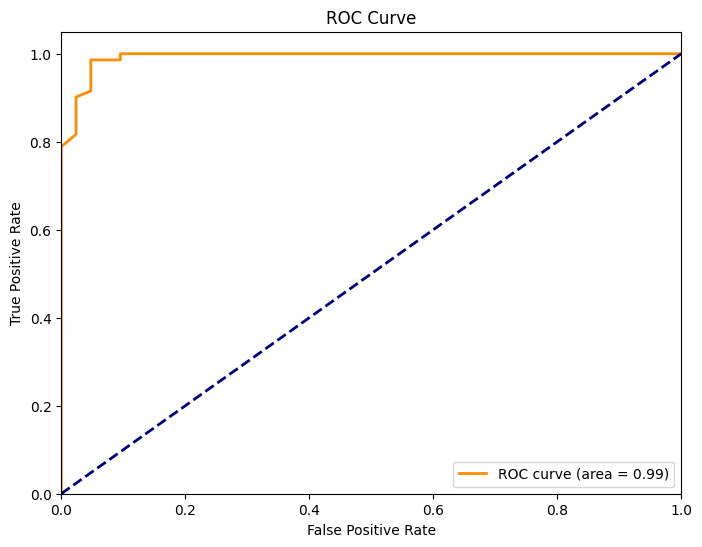

Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualize AUC-ROC curve
y_scores = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Dimensionality Reduction
# 1. PCA
## 1.1 PCA (Linear)

We will reduce the dimension of dataset into 2 dimensions and visualize it using scikit-learn and matplotlib packages.

The data is the same as used in the above task.

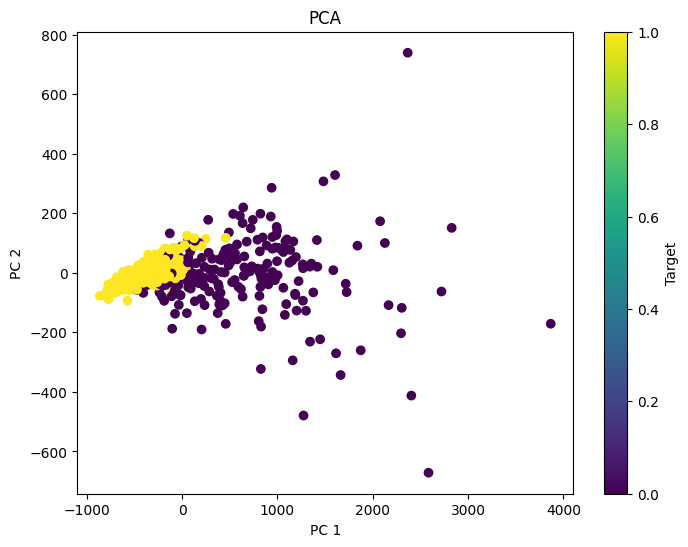

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Build a PCA model and reduce the dimensionality into 2. (You can change the number of dimension as you want.)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()

## 1.2. Kernel PCA

This is used for reducing dimensionality of non-linear data.

The method is almost same with linear PCA.

But in the dataset we used here, which is assumed as linear, the kernel PCA is not appropriate.

So, when doing the final project, just use the method that suits your data.

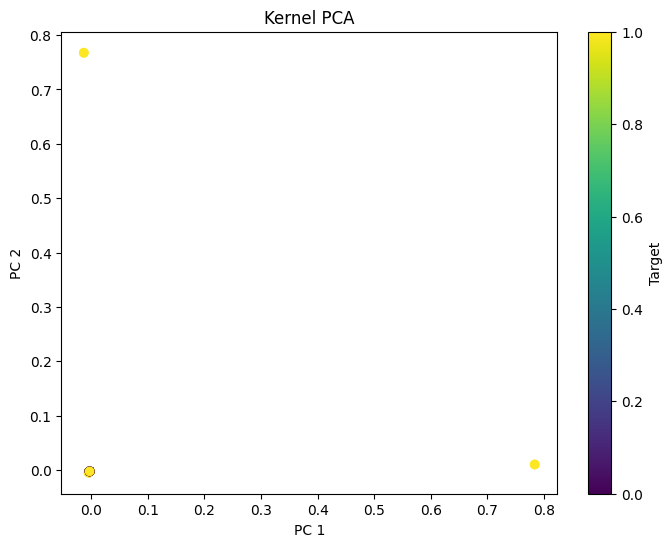

In [ ]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Build a Kernel PCA model and reduce the dimensionality into 2.
# I use rbf kernel.
kpca = KernelPCA(kernel='rbf', gamma=0.1, n_components=2)
X_kpca = kpca.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
plt.title('Kernel PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()

# 2. Manifold learning
## 2.1 Isomap

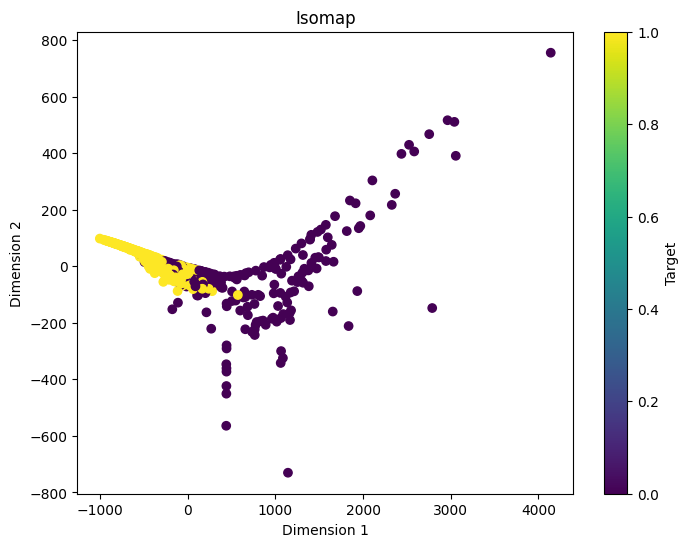

In [ ]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Build a Isomap model and reduce the dimensionality into 2.
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='viridis')
plt.title('Isomap')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

## 2.2 Multi-Dimensional Scaling (MDS)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


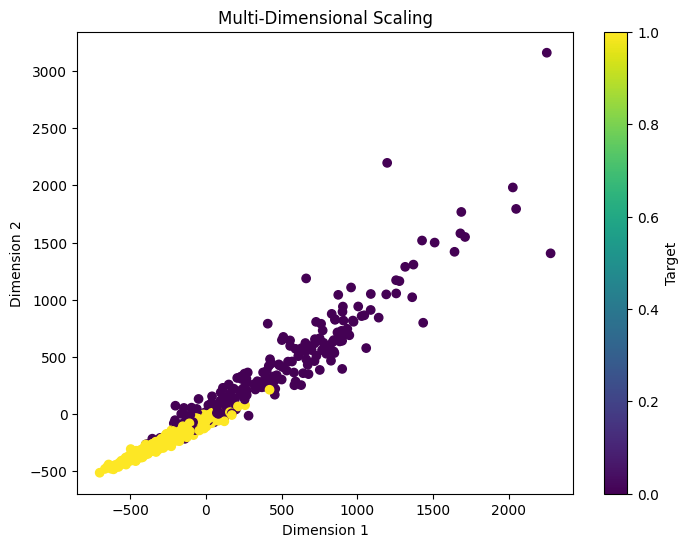

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Build a MDS model and reduce the dimensionality into 2.mds = MDS(n_components=2)
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis')
plt.title('Multi-Dimensional Scaling')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

## 2.3 Laplacian Eigenmap

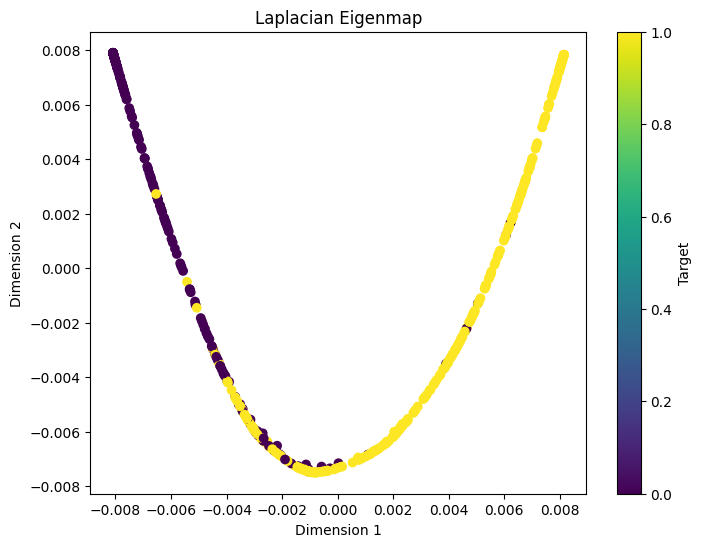

In [ ]:
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

# Build a Laplacian Eigenma model and reduce the dimensionality into 2.mds = MDS(n_components=2)
laplacian = SpectralEmbedding(n_components=2)
X_laplacian = laplacian.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_laplacian[:, 0], X_laplacian[:, 1], c=y, cmap='viridis')
plt.title('Laplacian Eigenmap')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

# Clustering
# 1. K-Means clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


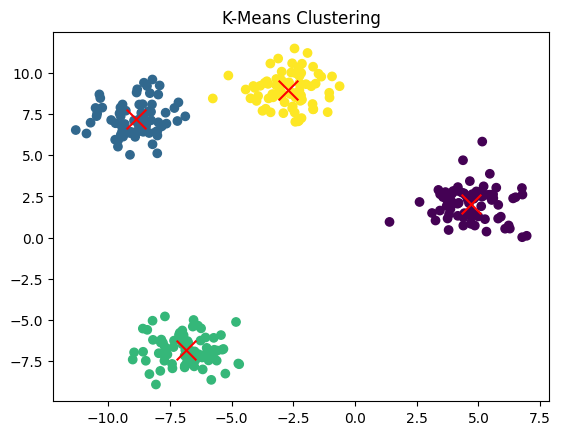

In [ ]:
# Import KMeans clustering
from sklearn.cluster import KMeans

# Generate the dataset. Here, we assume that data is 2-dimensional data.
data = datasets.make_blobs(n_samples=300, centers=4, random_state=42)

# K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

# Visualizing
plt.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('K-Means Clustering')
plt.show()

# 2. DBSCAN clustering

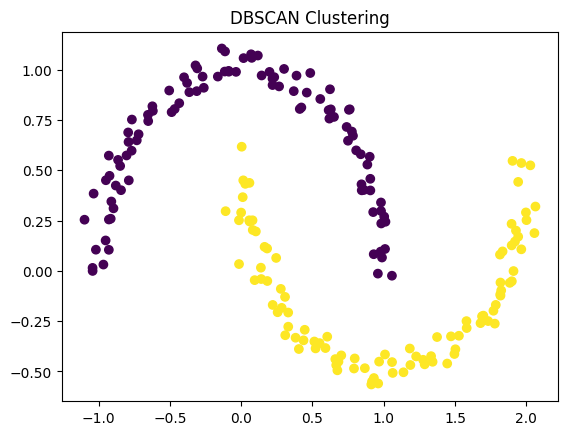

In [ ]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Generate the dataset. Here, we assume that data is 2-dimensional data.
data = datasets.make_moons(n_samples=200, noise=0.05, random_state=42)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(data[0])

# Visualizing
plt.scatter(data[0][:, 0], data[0][:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


# 3. Hierarchical clustering

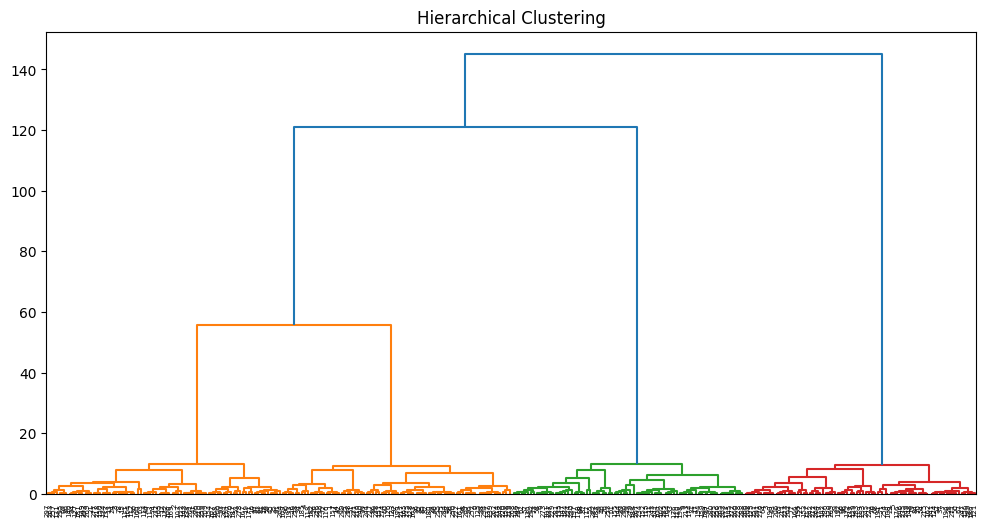

In [ ]:
# Import hierarchical custering in scipy package
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the dataset
data = datasets.make_blobs(n_samples=300, centers=4, random_state=42)

# Calculate distance matrix
linked = linkage(data[0], method='ward')

# Visualizing dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=range(len(data[0])), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering')
plt.show()
